<a href="https://colab.research.google.com/github/Vivek-Sajjan/DS_Projects/blob/main/M8_NB_MiniProject_1_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project 1: Market Basket analysis

## Learning Objectives

At the end of the experiment, you will be able to:

* extract summary level insight from a given dataset

* Integrate the data and identify the underlying pattern or structure

* understand the fundamentals of market basket analysis

* construct "rules" that provide concrete recommendations for businesses

## Dataset

The dataset chosen for this mini project is **Instacart Dataset**. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, there are orders between 4 and 100, with the sequence of products purchased in each order. The dataset also includes the products in each order, the time of day and day of week of each order, the name and aisle/department of each product, which are stored across various files.

## Problem Statement


Extract association rules and find groups of frequently purchased items from a large-scale grocery orders dataset.

## Grading = 10 Points

#### Import required packages

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## **Stage 1**: Data Wrangling

We have five different files:

    - orders.csv
    - order_products__train.csv
    - products.csv
    - aisles.csv
    - departments.csv

These files contain the neccesary data to solve the problem. Load all the files correctly, after observing the header level details, data records etc

**Hint:** Use `read_csv` from pandas

In [21]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Instacart.zip
!unzip -qq Instacart.zip

replace Instacart/aisles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Load the data

Load all the given datasets

In [22]:
# YOUR CODE HERE

In [23]:
import pandas as pd
orders_df = pd.read_csv('Instacart/orders.csv')
order_products_train_df = pd.read_csv('Instacart/order_products__train.csv')
products_df = pd.read_csv('Instacart/products.csv')
aisles_df = pd.read_csv('Instacart/aisles.csv')
departments_df = pd.read_csv('Instacart/departments.csv')

In [25]:
orders_df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [26]:
orders_df.shape

(3421083, 7)

In [27]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [28]:
order_products_train_df.shape

(1384617, 4)

In [29]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [30]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [31]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### Data Integration (1 point)

As the required data is present in different files, we need to integrate all the five to make single dataframe/dataset. For that purpose, use the unique identifier provided in all the dataframes so that it can be used to map the data in different files correctly.

**Example:** `product_id` is available in both `products` dataframe and `order_products__train` dataframe, we can merge these two into a single dataframe based on `product_id`

**Hint:** [pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [32]:
# YOUR CODE HERE

In [33]:
# prompt: merge the products dataframe and order_products__train dataframe based on product_id

import pandas as pd
train_df = pd.merge(order_products_train_df, products_df, on='product_id', how='left')
train_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15


In [34]:
# prompt: merge orders dataframe with train dataframe based on order id

import pandas as pd
df = pd.merge(train_df, orders_df, on='order_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0


In [35]:
# prompt: merge df dataframe with aisles based on aisle_id

import pandas as pd
df = pd.merge(df, aisles_df, on='aisle_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood


In [36]:
# prompt: merge df dataframe with department based on department_id

import pandas as pd
df = pd.merge(df, departments_df, on='department_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,canned goods


In [42]:
df.shape

(1384617, 15)

In [43]:
# prompt: get the count of unique product_id

print("Count of unique product_id:", df['product_id'].nunique())

Count of unique product_id: 39123


### Understanding relationships and new insights from the data (3 points)

1.  How many times was each product ordered?

    **Hint:** group orders by product
    

2.  Find the number of orders per department and visualize using an appropriate plot


3.  On which day of the week do customers tend to buy more groceries? Which are the peak hours
of shopping?

  * Find the frequency of orders on week days using an appropriate plot
  * Find the frequency of orders during hours of the day using an appropriate plot?
  

4. Find the ratio of Re-ordered and Not Re-ordered products and visualize it

5. Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

In [44]:
# prompt: How many times was each product ordered? group orders by product

product_counts = df['product_name'].value_counts()
product_counts

,count
product_name,
Banana,18726
Bag of Organic Bananas,15480
Organic Strawberries,10894
Organic Baby Spinach,9784
Large Lemon,8135
...,...
Clear Complexion Daily Moisturizer,1
Classic Original Lip Balm SPF 12,1
Sprinkles Decors,1


In [37]:
# YOUR CODE HERE

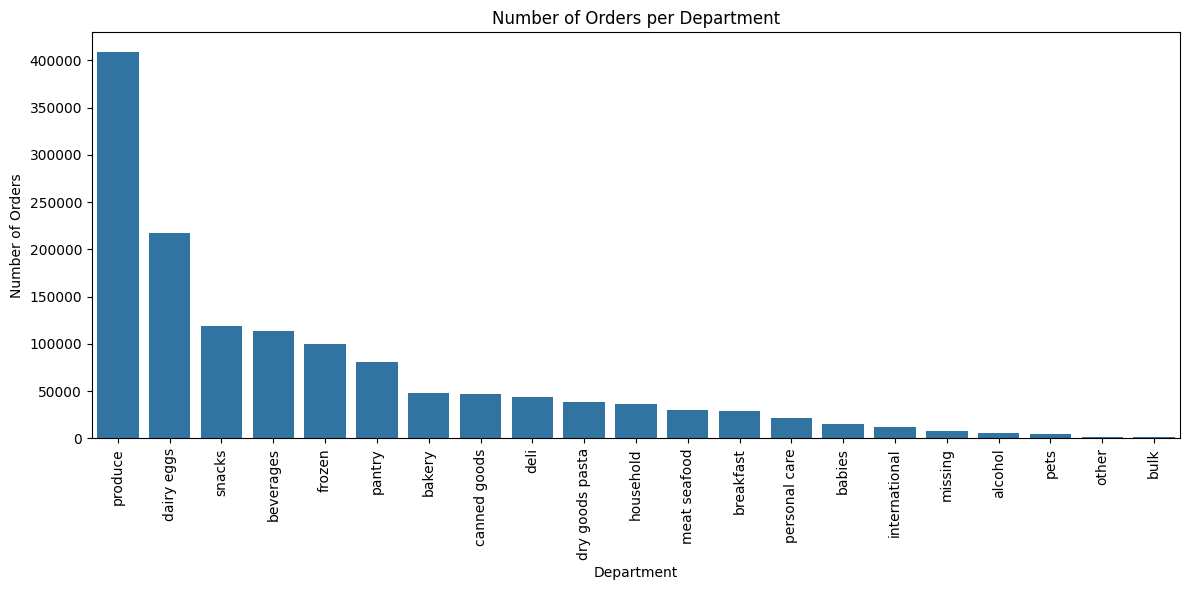

In [45]:
import matplotlib.pyplot as plt
department_orders = df['department'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=department_orders.index, y=department_orders.values)
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Department')
plt.tight_layout()
plt.show()

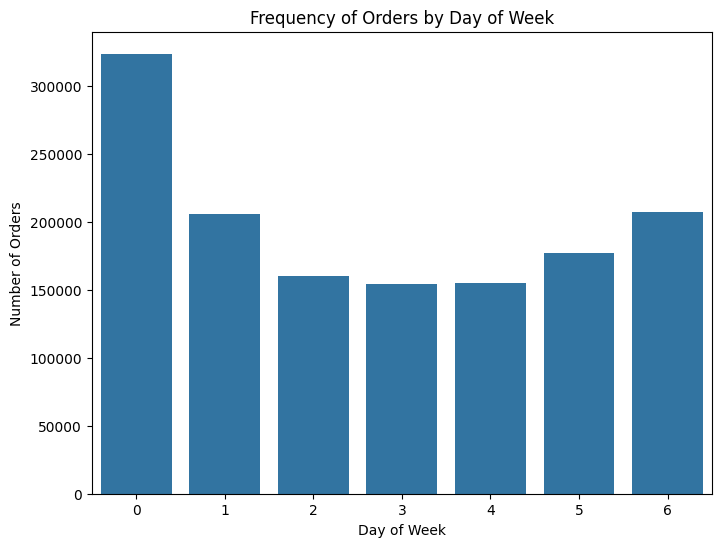

In [46]:
# prompt: Find the frequency of orders on week days using an appropriate plot

import matplotlib.pyplot as plt
weekday_counts = df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders by Day of Week')
plt.xticks(ticks=range(7), labels=['0', '1', '2', '3', '4', '5', '6']) # Assuming 0 is Sunday and 6 is Saturday or vice versa, adjust labels as needed
plt.show()

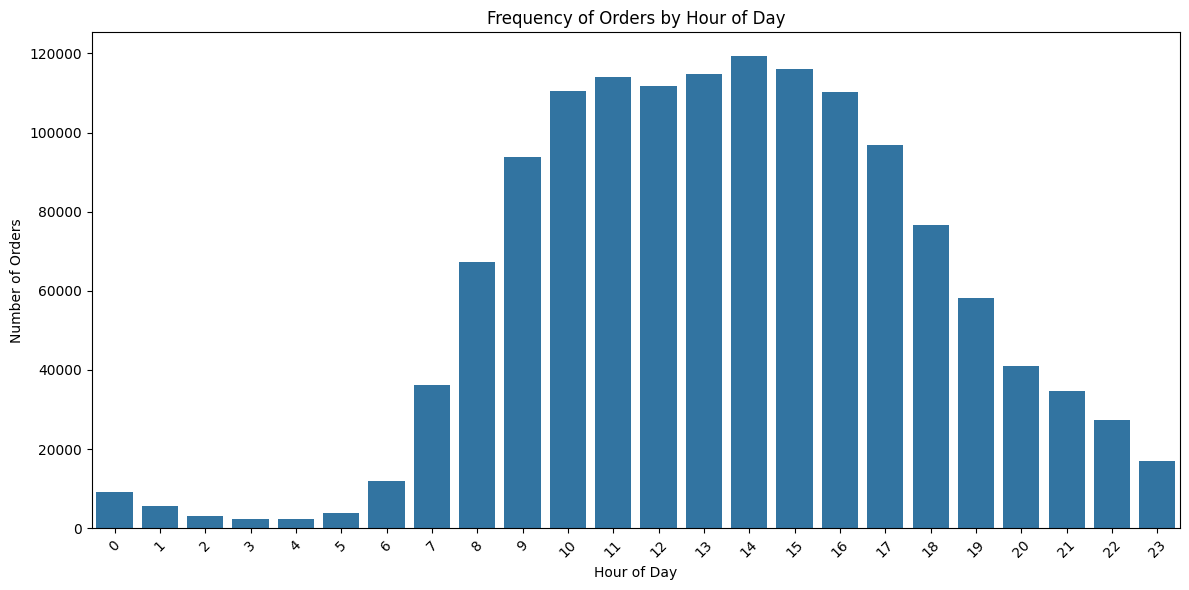

In [47]:
# prompt: Find the frequency of orders during hours of the day using an appropriate plot

import matplotlib.pyplot as plt
hour_counts = df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders by Hour of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Re-order Ratio:
 reordered
1    0.598594
0    0.401406
Name: count, dtype: float64


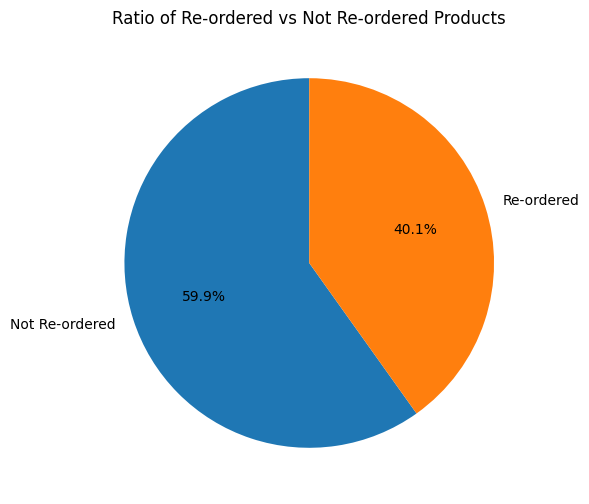

In [50]:
# prompt: Find the ratio of Re-ordered and Not Re-ordered products and visualize it

import matplotlib.pyplot as plt
reorder_counts = df['reordered'].value_counts()
reorder_ratio = reorder_counts / reorder_counts.sum()

print("Re-order Ratio:\n", reorder_ratio)

plt.figure(figsize=(6, 6))
plt.pie(reorder_counts, labels=['Not Re-ordered', 'Re-ordered'], autopct='%1.1f%%', startangle=90)
plt.title('Ratio of Re-ordered vs Not Re-ordered Products')
plt.show()

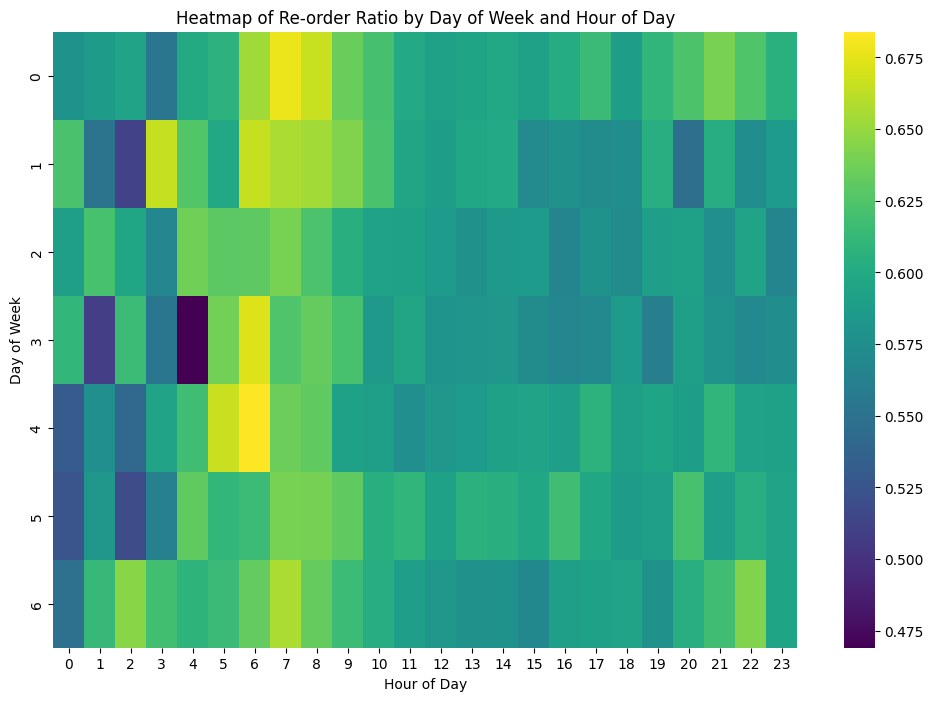

In [53]:
# prompt: Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

import matplotlib.pyplot as plt
reorder_day_hour = df.groupby(['order_dow', 'order_hour_of_day'])['reordered'].mean().reset_index()
reorder_day_hour_pivot = reorder_day_hour.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12, 8))
sns.heatmap(reorder_day_hour_pivot, cmap='viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Heatmap of Re-order Ratio by Day of Week and Hour of Day')
plt.show()

## **Stage 2:** Create a basket (4 points)

As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

**Assumption:** Segment the data by considering the 100 most frequent ordered items. Please note it is just an assumption. You can consider 'n' frequent order items as per your choice.

**Hint:**

- Drop the unwanted columns

- Find the frequencies of orders based on the products and  consider the 100 most frequent order items.

    **Hint:** Count the frequencies of orders for each product_id using `groupby()` and `count()` respectively

- Extract the records of 100 most frequent items (which are extracted in previous step) from combined dataframe.

- Create a Pivot table with `order_id` as index and `product_name` as columns and `reorder` as values.

    - set the `order_id` as index using set_index()
    - fill all the nan values with 0

- After performing the above step, there are a lot of zeros in the data, make sure that any positive values are converted to a 1 and anything less than 0 is set to 0.


In [54]:
# prompt: create  new dataframe  by considering the 100 most frequent ordered items.

# Get the top 100 most frequent products
top_100_products = product_counts.head(100).index

# Filter the original dataframe to include only orders with the top 100 products
df_top_100 = df[df['product_name'].isin(top_100_products)]

# Create the basket pivot table
basket = df_top_100.pivot_table(index='order_id', columns='product_name', values='reordered', aggfunc='sum')

# Fill NaN values with 0
basket = basket.fillna(0)

# Convert any positive values to 1 and anything less than 0 to 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket = basket.applymap(encode_units)
basket.head()

/tmp/ipython-input-54-3068463171.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode_units)


product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
# YOUR CODE HERE

## **Stage 3:** Apply Apriori algorithm (2 points)

- As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

  **Assumption:** Segment the basket by considering 100000 records. Please note its just an assumption, you can consider 'n'  records as per your choice.

  **Hint:** [apriori](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)

- Find the association rules and make a dataframe

In [39]:
# YOUR CODE HERE

In [57]:
# prompt: As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.
# Segment the basket by considering 100000 records.
# Find the association rules and make a dataframe

import pandas as pd
# Segment the basket by considering 100000 records
basket_subset = basket.head(100000)

# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(basket_subset, min_support=0.01, use_colnames=True)

# Find association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules in a dataframe
rules_df = pd.DataFrame(rules)
rules_df.head(20)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Organic Baby Spinach),(Bag of Organic Bananas),0.085828,0.142376,0.018498,0.215518,1.513725,1.0,0.006278,1.093236,0.371241,0.088207,0.085285,0.172719
1,(Bag of Organic Bananas),(Organic Baby Spinach),0.142376,0.085828,0.018498,0.129921,1.513725,1.0,0.006278,1.050676,0.395719,0.088207,0.048232,0.172719
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.064379,0.142376,0.021449,0.333168,2.340054,1.0,0.012283,1.286117,0.612064,0.115750,0.222465,0.241909
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.142376,0.064379,0.021449,0.150651,2.340054,1.0,0.012283,1.101574,0.667728,0.115750,0.092208,0.241909
4,(Organic Raspberries),(Bag of Organic Bananas),0.045594,0.142376,0.014811,0.324842,2.281578,1.0,0.008319,1.270257,0.588541,0.085533,0.212758,0.214434
5,(Bag of Organic Bananas),(Organic Raspberries),0.142376,0.045594,0.014811,0.104026,2.281578,1.0,0.008319,1.065217,0.654957,0.085533,0.061224,0.214434
6,(Organic Strawberries),(Bag of Organic Bananas),0.091668,0.142376,0.025456,0.277694,1.950424,1.0,0.012404,1.187341,0.536468,0.122037,0.157782,0.228242
7,(Bag of Organic Bananas),(Organic Strawberries),0.142376,0.091668,0.025456,0.178791,1.950424,1.0,0.012404,1.106091,0.568187,0.122037,0.095915,0.228242
8,(Banana),(Large Lemon),0.176420,0.063111,0.016537,0.093737,1.485260,1.0,0.005403,1.033793,0.396704,0.074159,0.032688,0.177883
9,(Large Lemon),(Banana),0.063111,0.176420,0.016537,0.262029,1.485260,1.0,0.005403,1.116007,0.348726,0.074159,0.103948,0.177883
